<a href="https://colab.research.google.com/github/PondKann/CXR-Project/blob/main/Perceptron00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perceptron Single Layer




    
)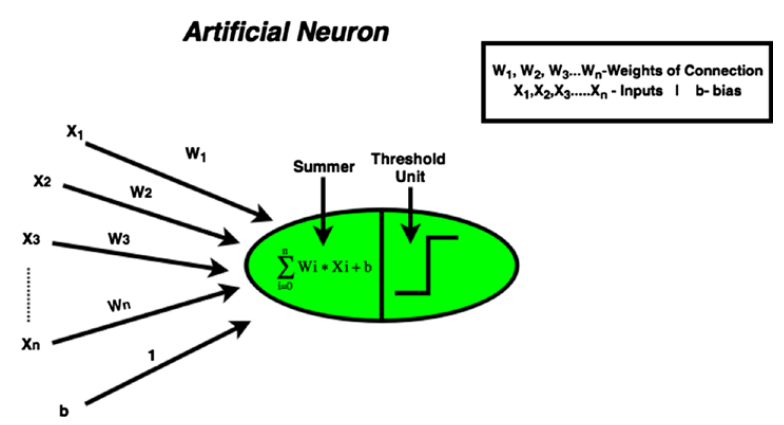

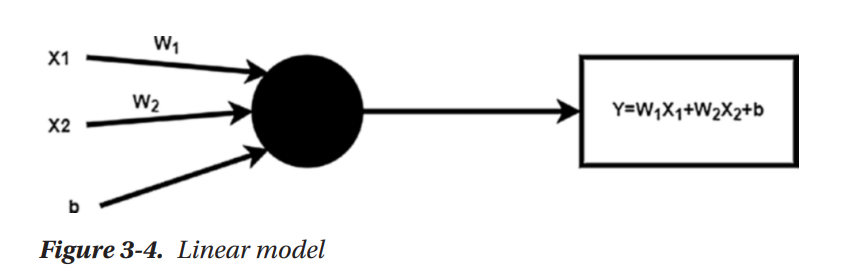

In [1]:
x_input = [0.1, 0.5, 0.2]
w_weights = [0.4, 0.3, 0.6]
threshold = 0.5                                 #ตั้งเกณฑ์

def step(weighted_sum):                      #ฟังก์ชันชื่อ step 
    if weighted_sum > threshold:            #ถ้า weighted_sum มากกว่า threshold ให้เป็นค่า 1
        return 1
    else:
        return 0
    
def perceptron():                                   #
    weighted_sum = 0
    for x,w in zip(x_input, w_weights):     #รันไปตามทุกตัวของ  x_input และ  w_weights 
        weighted_sum += x*w                  # x*w แล้ว นำไปเก็บใน weighted_sum
        print(weighted_sum)                      #ปริ้น weighted_sum
    return step(weighted_sum)                 #แสดงค่า ที่ได้จาก ฟังก์ชัน step 

output =  perceptron()                                  
print("output: " + str(output))

0.04000000000000001
0.19
0.31
output: 0


## Perceptron01
CXR 

In [6]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras import regularizers
from keras.layers.core import Dropout

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
train_dir = '/content/drive/My Drive/Senior Project/xray_dataset_covid19/train'
validation_dir = '/content/drive/My Drive/Senior Project/xray_dataset_covid19/test'

In [10]:
train_normal_dir = os.path.join(train_dir,'NORMAL')
train_pneumonia_dir = os.path.join(train_dir,'PNEUMONIA')
validation_normal_dir = os.path.join(validation_dir,'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir,'PNEUMONIA')

In [14]:
train_normal_names = os.listdir(train_normal_dir)
train_pneumonia_names = os.listdir(train_pneumonia_dir)

In [ ]:
train_normal_names[:5]

In [38]:
img = cv2.imread(os.path.join(train_normal_dir, 'IM-0006-0001.jpeg' ))

In [ ]:
plt.imshow(img)

In [46]:
img.shape

(1326, 1663, 3)

In [15]:
print('total training normal-rays :', len(os.listdir(train_normal_dir)))   # เช็คว่าใน train_normal_dir มีกี่ภาพ
print('total training Pneumonia x-rays:', len(os.listdir(train_pneumonia_dir)))
print('total validation normal-rays :', len(os.listdir(validation_normal_dir)))
print('total validation Pneumonia x-rays:', len(os.listdir(validation_pneumonia_dir)))

total training normal-rays : 74
total training Pneumonia x-rays: 74
total validation normal-rays : 20
total validation Pneumonia x-rays: 20


In [16]:
train_data_generator = ImageDataGenerator(rescale = 1/255)
validation_data_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_data_generator.flow_from_directory(
        train_dir,
        target_size = (150,150),
        batch_size = 16,
        class_mode = 'binary')

validation_generator = validation_data_generator.flow_from_directory(
        validation_dir,
        target_size = (150,150),
        batch_size = 16,
        class_mode = 'binary')

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


Model Create

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 16)        4

In [ ]:
history=model.fit_generator(generator=train_generator,    
                            epochs = 5,
                            validation_data = validation_generator,
                           )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
10/10 [==============================] - 91s 10s/step - loss: 1.0985 - accuracy: 0.5676 - val_loss: 1.1930 - val_accuracy: 0.5000
Epoch 2/5
10/10 [==============================] - 13s 1s/step - loss: 0.9496 - accuracy: 0.5946 - val_loss: 0.6546 - val_accuracy: 0.7500
Epoch 3/5
10/10 [==============================] - 13s 1s/step - loss: 0.6095 - accuracy: 0.6689 - val_loss: 0.5756 - val_accuracy: 0.5500
Epoch 4/5
10/10 [==============================] - 13s 1s/step - loss: 0.5733 - accuracy: 0.7230 - val_loss: 0.6201 - val_accuracy: 0.7250
Epoch 5/5
10/10 [==============================] - 13s 1s/step - loss: 0.4355 - accuracy: 0.8108 - val_loss: 0.1755 - val_accuracy: 0.9750


Results

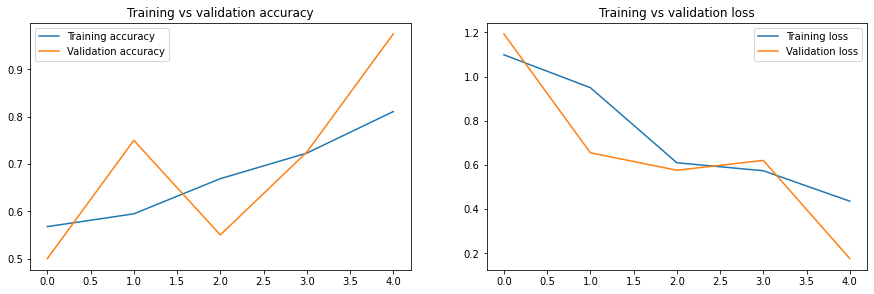

In [ ]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

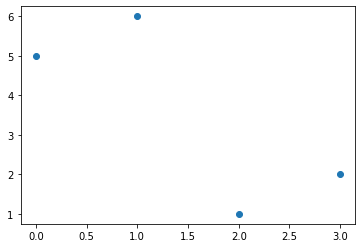

In [63]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
labels = ['เฉด1','เฉด2','เฉด2','เฉด4']
x = np.arange(len(labels))
y = [5,6,1,2]

plt.scatter(x, y)
plt.show()

## Perceptron02

Cats Dogs

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
import tensorflow_datasets
mnist = tensorflow_datasets.load('mnist')

In [ ]:
!pip install -q git+https://github.com/tensorflow/examples.git

In [ ]:
import tensorflow as tf 
from tensorflow.examples.tutorials.mnist import input_data 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True) 